## Import relevant packages
import pandas to read the csv file

import matplotlib to visualise raw data

import numpy to clean up and correct numerical data

In [25]:

import pandas as pd
import matplotlib
from matplotlib import colors
from matplotlib.backends import backend_agg
import numpy as np
%matplotlib inline


## Use Pandas to read the CSV file in table form

In [15]:
lung_cancer_raw_data = pd.read_csv("data/lung_cancer.csv")
lung_cancer_raw_data

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,14681542544117760,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1271684316815736300,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1708068119984828000,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,355582900676614900,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1684597863357175300,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,620214966225393400,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1157407185152395000,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1488013696766258000,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1
10346,398703475201552000,69,Male,No,Not Present,High,81,75,2014,Still Smoking,No,Medium,Right,1


## Check for abnormal, outliers, duplicates and missing data

### Check for duplicate and non-numeric Patient IDs

In [64]:
# convert any non-numeric ID to NaN
lung_cancer_raw_data['ID'] = pd.to_numeric(lung_cancer_raw_data['ID'], errors='coerce')

# Filter rows with NaN
non_numeric_rows = lung_cancer_raw_data[lung_cancer_raw_data['ID'].isna()]

# Display NaN rows (if any). For this dataset, there are no NaN entries
print(non_numeric_rows)

# Identify duplicates based on the 'ID' column
duplicates_mask = lung_cancer_raw_data['ID'].duplicated(keep=False)

# Group the DataFrame by the 'ID' column
grouped_duplicates = lung_cancer_raw_data[duplicates_mask].sort_values(by='ID')

# Display the details of duplicated rows - duplicated entries appear to be entirely similar
print(grouped_duplicates)

# drop duplicate entries
lung_cancer_raw_data.drop_duplicates(subset=['ID'], inplace=True)

# Check that duplicate entries have been removed.
check_duplicates = lung_cancer_raw_data.duplicated(subset=['ID'], keep='first')

check_duplicates.value_counts()


Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []
Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []


False    9997
Name: count, dtype: int64

### Check for negative and missing Age values

In [40]:
# Create a boolean mask for negative Age values
negative_age_mask = lung_cancer_raw_data['Age'] < 0

# Filter rows with negative Age values
rows_with_negative_age = lung_cancer_raw_data[negative_age_mask]

# Update the 'Age' column by using numpy's abs function to convert all -ve ages to +ve
lung_cancer_raw_data.loc[negative_age_mask, 'Age'] = np.abs(lung_cancer_raw_data.loc[negative_age_mask, 'Age'])

# verify that -ve values in 'Age' column have been corrected.
print(lung_cancer_raw_data[["Age"]].describe())

# check that there are no missing values for age
lung_cancer_raw_data[["Age"]].isnull().value_counts()


                Age
count  10348.000000
mean      64.081272
std       14.278054
min       18.000000
25%       55.000000
50%       64.000000
75%       74.000000
max      120.000000


Age  
False    10348
Name: count, dtype: int64

### Check gender data for missing/mispelt entries

In [44]:
# Replace "MALE" with "Male" and "FEMALE" with "Female"
lung_cancer_raw_data["Gender"] = lung_cancer_raw_data["Gender"].replace({"MALE": "Male", "FEMALE": "Female"})

# Remove row where 'Gender' is 'NAN', since there is only 1 entry
lung_cancer_raw_data = lung_cancer_raw_data[lung_cancer_raw_data['Gender'] != 'NAN']

print(lung_cancer_raw_data[["Gender"]].value_counts())

lung_cancer_raw_data[["Age"]].isnull().value_counts()

Gender
Male      5977
Female    4370
Name: count, dtype: int64


Age  
False    10347
Name: count, dtype: int64

### Check for non Yes/No entries in COPD History

In [69]:
# Check for values other than Yes/No
lung_cancer_raw_data['COPD History'].value_counts(dropna=False)

# Assumption made that null values should most likely by No, since COPD is a serious condition and it would most likely be documented if it occurred.
lung_cancer_raw_data['COPD History'].fillna('No', inplace=True)

# Verify that null values have been replaced with No
lung_cancer_raw_data['COPD History'].value_counts(dropna=False)

COPD History
Yes    5499
No     4498
Name: count, dtype: int64

### Check for abnormal entries in Genetic Markers

In [70]:
# Check that there are only Present/Not Present values
lung_cancer_raw_data['Genetic Markers'].value_counts(dropna=False)

Genetic Markers
Not Present    7518
Present        2479
Name: count, dtype: int64

### Check for abnormal entries in Air Pollution Exposure

In [72]:
# Check that there are only High/Low/Medium values
lung_cancer_raw_data['Air Pollution Exposure'].value_counts(dropna=False)

# Remove the 3 NaN rows from dataset
lung_cancer_raw_data.dropna(subset=['Air Pollution Exposure'], inplace=True)

# verify that NaN values have been removed
lung_cancer_raw_data['Air Pollution Exposure'].value_counts(dropna=False)

Air Pollution Exposure
High      6070
Low       2336
Medium    1588
Name: count, dtype: int64

### Visualise and get statistics for each independent variable vs the dependent variable (lung cancer occurrence) to see if there is any significant correlation between the 2. Significant correlation could be positive or negative, and would be a large difference between those without lung cancer, and those with lung cancer for that independent variable.

### Independent variables deemed significant will be included inside the data for machine learning.

In [35]:
lung_cancer_vs_age = lung_cancer_raw_data.groupby('Lung Cancer Occurrence')['Age'].describe()
lung_cancer_vs_age

,count,mean,std,min,25%,50%,75%,max
Lung Cancer Occurrence,,,,,,,,
0,4718.0,63.930055,13.611737,18.0,55.0,64.0,73.0,115.0
1,5630.0,64.207993,14.813386,18.0,54.0,64.0,74.0,120.0


<Axes: >

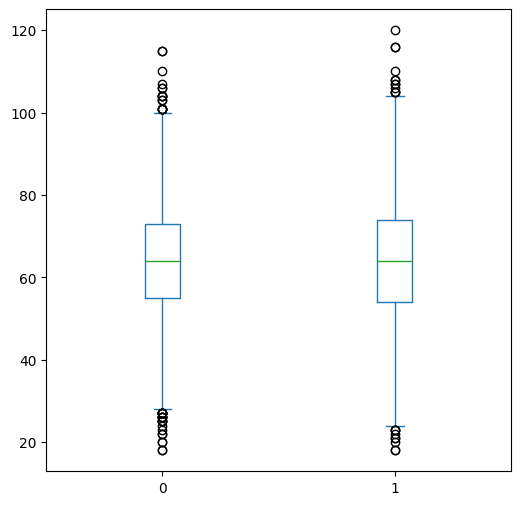

In [36]:
lung_cancer_raw_data.pivot(columns='Lung Cancer Occurrence', values='Age').plot(kind='box', figsize=(6,6))